(**Click the icon below to open this notebook in Colab**)

[![Open InColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/machine-learning-for-actuarial-science/blob/main/2025-spring/week05/notebook/demo.ipynb)

We will work with the Titanic datasets from Kaggle.
https://www.kaggle.com/competitions/titanic/data

| Variable   | Definition                                | Key                                  |
|------------|-------------------------------------------|--------------------------------------|
| survival   | Survival                                 | 0 = No, 1 = Yes                     |
| pclass     | Ticket class                             | 1 = 1st, 2 = 2nd, 3 = 3rd           |
| sex        | Sex                                      |                                      |
| Age        | Age in years                             |                                      |
| sibsp      | # of siblings / spouses aboard the Titanic |                                      |
| parch      | # of parents / children aboard the Titanic |                                      |
| ticket     | Ticket number                            |                                      |
| fare       | Passenger fare                           |                                      |
| cabin      | Cabin number                             |                                      |
| embarked   | Port of Embarkation                     | C = Cherbourg, Q = Queenstown, S = Southampton |


# 1. Loading the data

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
train.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


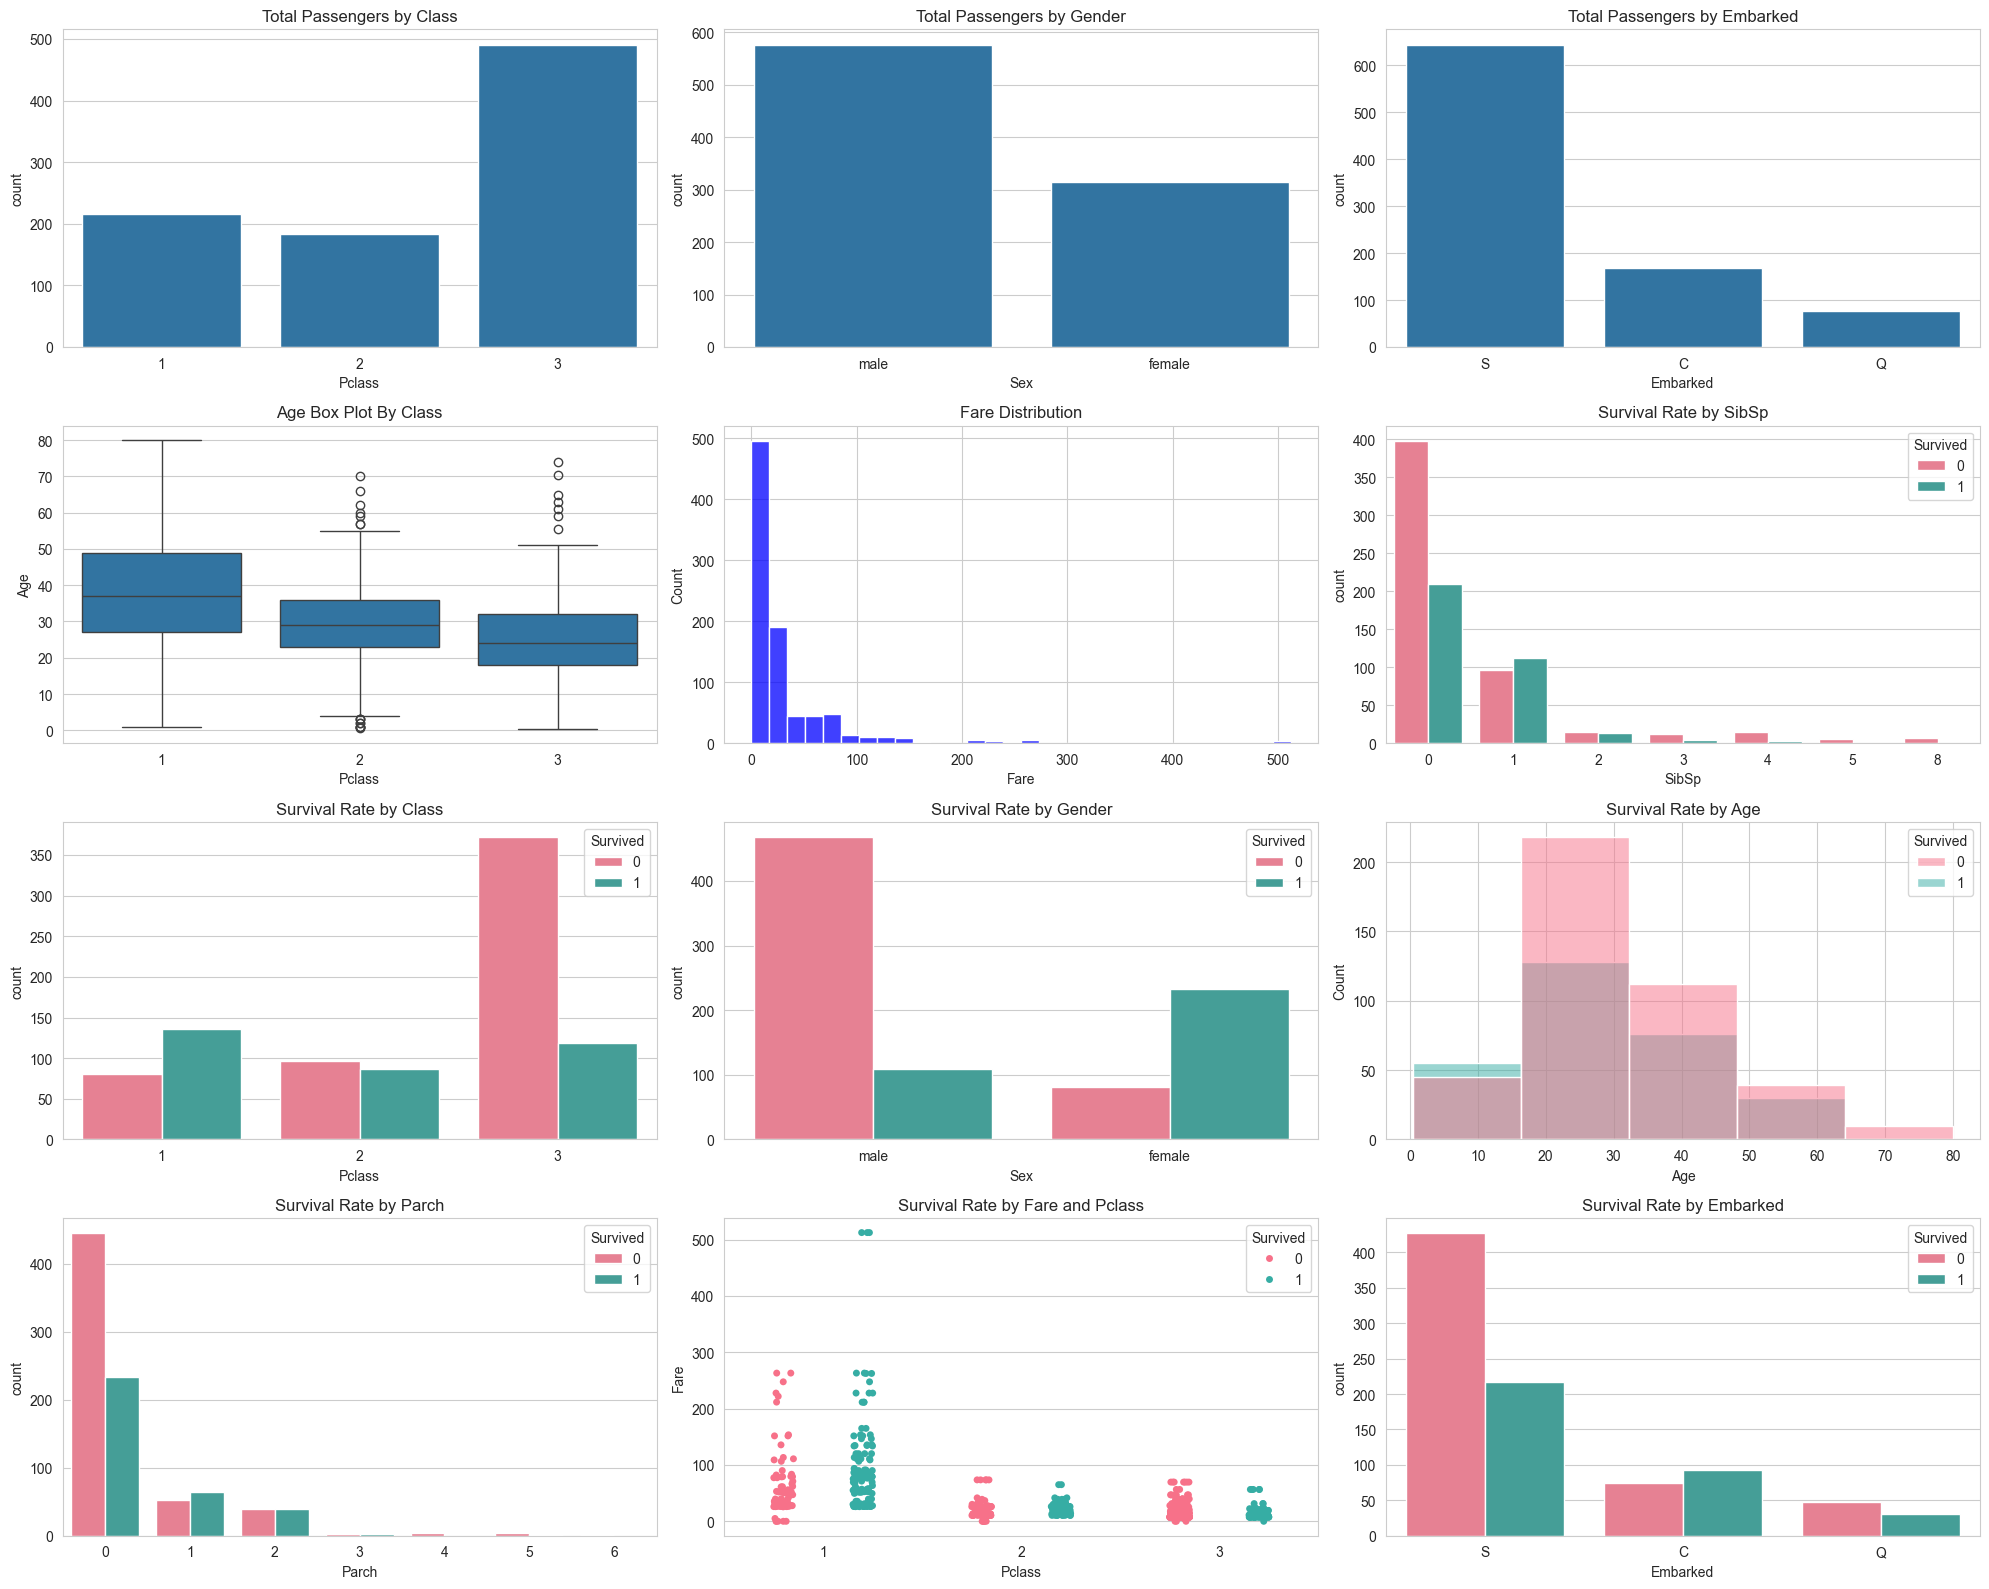

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Define color palette for consistency
palette = "husl"

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 16))

# 1st row
sns.countplot(x='Pclass', data=train, ax=axes[0, 0])
sns.countplot(x='Sex', data=train, ax=axes[0, 1])
sns.countplot(x='Embarked', data=train, ax=axes[0, 2])

# 2nd row
sns.boxplot(x='Pclass', y='Age', data=train, ax=axes[1, 0])
sns.histplot(train['Fare'].dropna(), ax=axes[1, 1], bins=30, color='b')
sns.countplot(x='SibSp', hue='Survived', data=train, ax=axes[1,2], palette=palette)

# 3rd row
sns.countplot(x='Pclass', hue='Survived', data=train, ax=axes[2, 0], palette=palette)
sns.countplot(x='Sex', hue='Survived', data=train, ax=axes[2, 1], palette=palette)
sns.histplot(x='Age', hue='Survived', data=train, ax=axes[2, 2], bins=5, palette=palette)

# 4th row
sns.countplot(x='Parch', hue='Survived', data=train, ax=axes[3, 0], palette=palette)
sns.stripplot(x='Pclass', y='Fare', hue='Survived', data=train, palette=palette, ax=axes[3, 1], jitter=True, dodge=True)
sns.countplot(x='Embarked', hue='Survived', data=train, ax=axes[3, 2], palette=palette)

# Set titles for each subplot
titles = [
    "Total Passengers by Class", 
    "Total Passengers by Gender", 
    "Total Passengers by Embarked", 
    "Age Box Plot By Class", 
    "Fare Distribution", 
    "Survival Rate by SibSp",
    "Survival Rate by Class", 
    "Survival Rate by Gender", 
    "Survival Rate by Age", 
    "Survival Rate by Parch",
    "Survival Rate by Fare and Pclass", 
    "Survival Rate by Embarked"
]

# Assign titles correctly
for ax, title in zip(axes.flat, titles):
    ax.set_title(title)

# Adjust layout
plt.tight_layout()
plt.show()


# 2. Exploratory Data Analysis

## 2.1 Outlier detection

![](https://miro.medium.com/v2/resize:fit:1400/1*0MPDTLn8KoLApoFvI0P2vQ.png)

In [8]:
import numpy as np
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])
train.loc[Outliers_to_drop] # Show the outliers rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
# Drop outliers
# train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

## 2.2 Missing values

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As can be seen above, there are missing values in the following columns:
- `Age`
- `Cabin`
- `Embarked`

Missing values are typically bad and need to be handled. However, some algorithms can handle missing values, such as decision trees.

### 2.3. Feature Engineering

Here are the general types of data we could encounter:
- **Categorical data**:
  - With ordinal relationships - e.g., ratings, grades
  - Without ordinal relationships - e.g., colors, brands
- **Numerical data**:
  - Discrete - e.g., number of children, number of votes
  - Continuous - e.g., height, weight, temperature

Ultimately, we want to convert all data into numerical data for computation, which means that we need to convert categorical data into numerical data.


In [12]:
Survival = train['Survived']
Survival.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

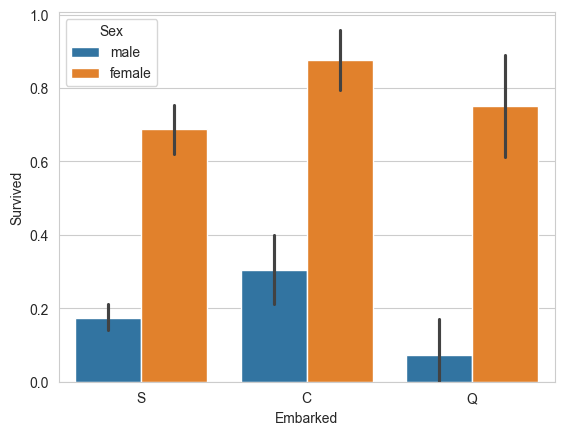

In [14]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train)
plt.show()

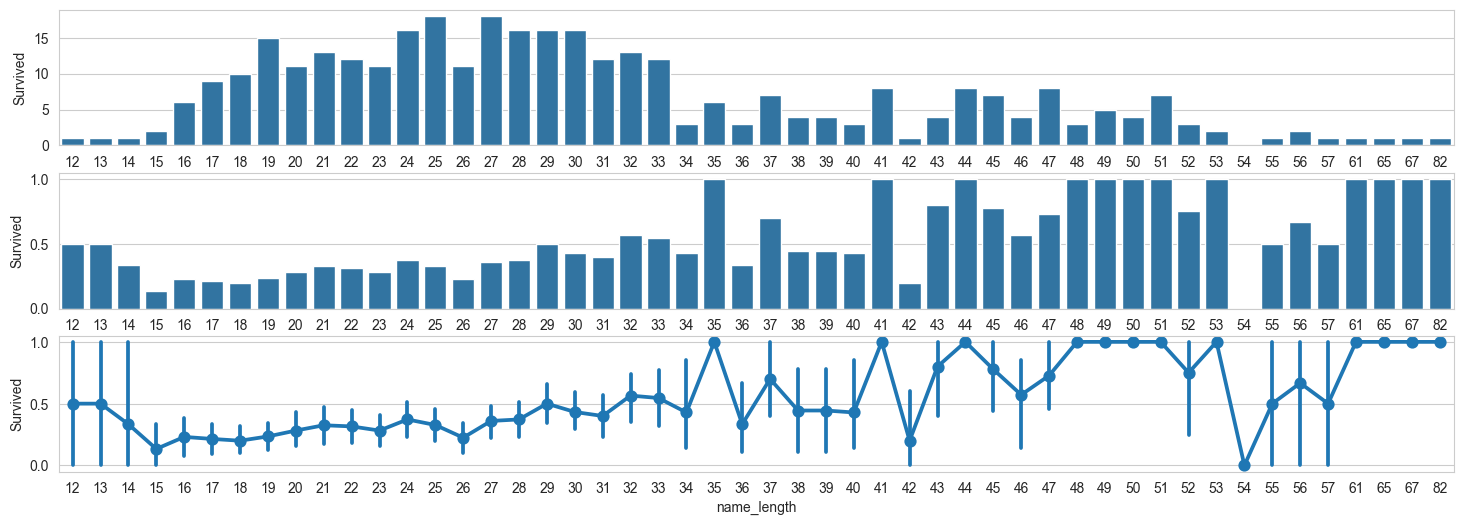

In [19]:
train['name_length'] = train['Name'].apply(len)
sum_Name = train[["name_length", "Survived"]].groupby(['name_length'],as_index=False).sum()
average_Name = train[["name_length", "Survived"]].groupby(['name_length'],as_index=False).mean()
fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(18,6))
sns.barplot(x='name_length', y='Survived', data=sum_Name, ax = axis1)
sns.barplot(x='name_length', y='Survived', data=average_Name, ax = axis2)
sns.pointplot(x = 'name_length', y = 'Survived', data=train, ax = axis3)
plt.show()

In [23]:
train.loc[ train['name_length'] <= 23, 'name_length'] = 0
train.loc[(train['name_length'] > 23) & (train['name_length'] <= 28), 'name_length'] = 1
train.loc[(train['name_length'] > 28) & (train['name_length'] <= 40), 'name_length'] = 2
train.loc[ train['name_length'] > 40, 'name_length'] = 3
train['name_length'].value_counts()

name_length
0    360
1    240
2    201
3     90
Name: count, dtype: int64

In [25]:
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)    

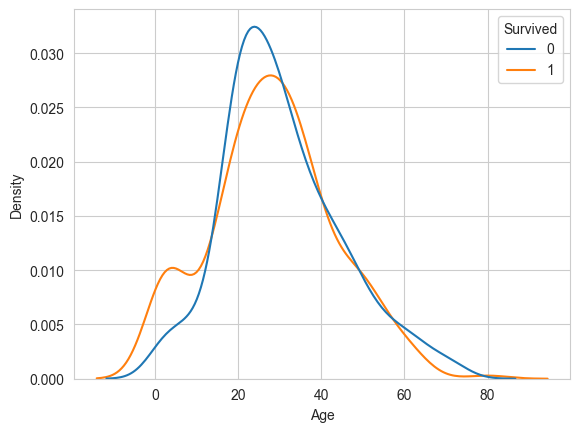

In [ ]:
#plot distributions of age of passengers who survived or did not survive
sns.kdeplot(x='Age', data=train, hue='Survived', common_norm=False)
# sns.displot(x='Age', data=train, hue='Survived', kind='kde', common_norm=False)
plt.show()

In [48]:

age_avg = train['Age'].mean()
age_std = train['Age'].std()
age_null_count = train['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
train['Age'][np.isnan(train['Age'])] = age_null_random_list
train['Age'] = train['Age'].astype(int)
# Qcut is a quantile based discretization function to autimatically create categories (not used here)
# train['Age'] = pd.qcut(train['Age'], 6, labels=False)
# Using categories as defined above
train.loc[ train['Age'] <= 14, 'Age'] 						          = 0
train.loc[(train['Age'] > 14) & (train['Age'] <= 30), 'Age']        = 5
train.loc[(train['Age'] > 30) & (train['Age'] <= 40), 'Age']        = 1
train.loc[(train['Age'] > 40) & (train['Age'] <= 50), 'Age']        = 3
train.loc[(train['Age'] > 50) & (train['Age'] <= 60), 'Age']        = 2
train.loc[ train['Age'] > 60, 'Age'] 							      = 4
train['Age'].value_counts()

/var/folders/78/njcscll93_s6cc27zw_h0pmr0000gn/T/ipykernel_98280/2428062434.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['Age'][np.isnan(train['Age'])] = age_null_random_list
/var/folders/78/njcscll93_s6cc27zw_h0pmr0000gn/T/ipyk

Age
5    429
1    220
3    100
0     78
2     42
4     22
Name: count, dtype: int64

In [49]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0,0.576923
2,2,0.404762
1,1,0.381818
3,3,0.370000
5,5,0.358974
4,4,0.227273


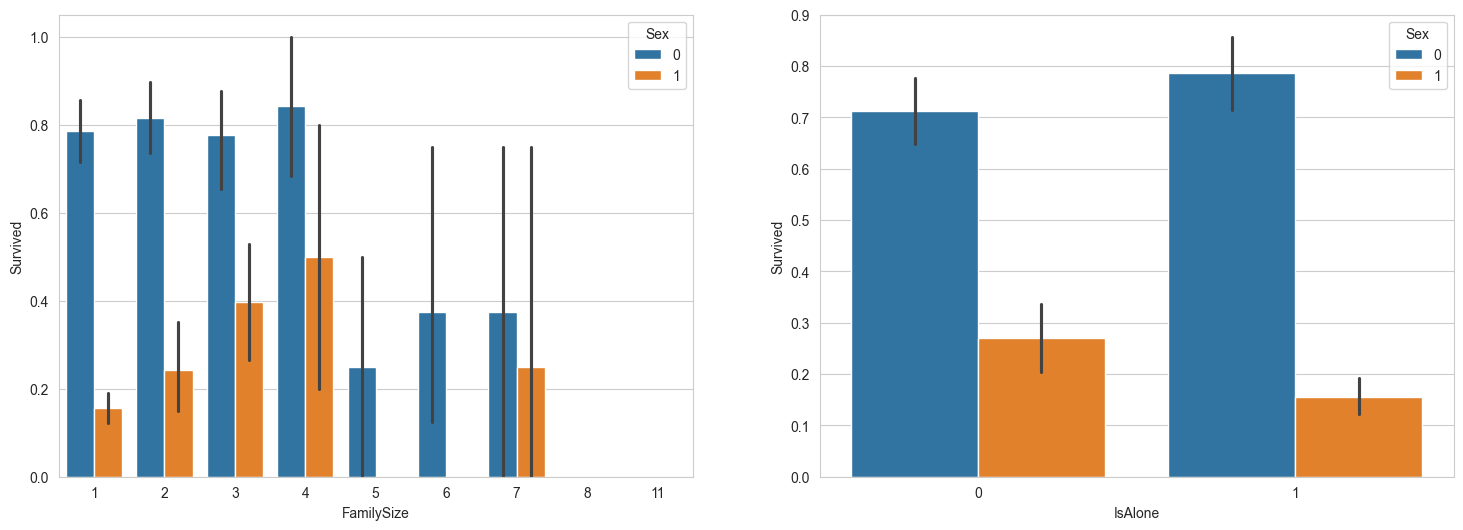

In [50]:
full_data = [train, test]

for dataset in full_data:
# Create new feature FamilySize as a combination of SibSp and Parch
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']+1
# Create new feature IsAlone from FamilySize
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
# Create new feature Boys from FamilySize
    dataset['Boys'] = 0
    dataset.loc[(dataset['Age'] == 0) & (dataset['Sex']==1), 'Boys'] = 1
    
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x="FamilySize", y="Survived", hue="Sex", data=train, ax = axis1);
sns.barplot(x="IsAlone", y="Survived", hue="Sex", data=train, ax = axis2);

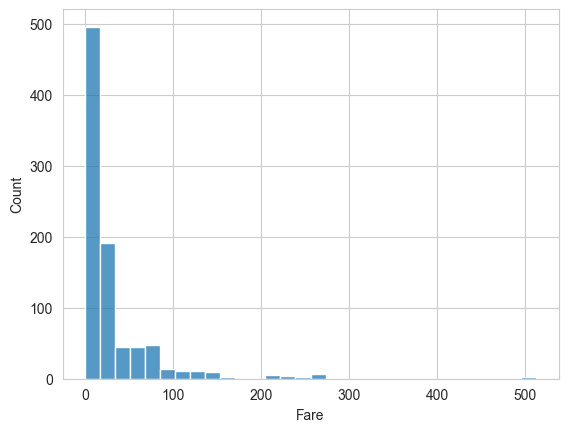

In [53]:
sns.histplot(x='Fare', data=train, bins=30)
plt.show()

/var/folders/78/njcscll93_s6cc27zw_h0pmr0000gn/T/ipykernel_98280/2274243705.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))


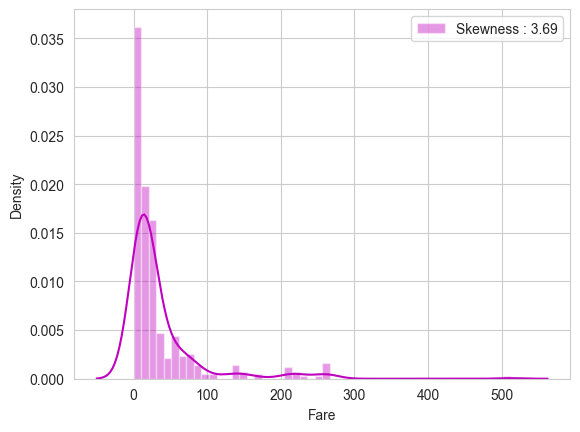

In [54]:
# Remove all NULLS in the Fare column and create a new feature Categorical Fare
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

# Explore Fare distribution 
g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

/var/folders/78/njcscll93_s6cc27zw_h0pmr0000gn/T/ipykernel_98280/2728744161.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(train["Fare"][train["Survived"] == 0], color="r", label="Skewness : %.2f"%(train["Fare"].skew()), ax=ax)
/var/folders/78/njcscll93_s6cc27zw_h0pmr0000gn/T/ipykernel_98280/2728744161.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist

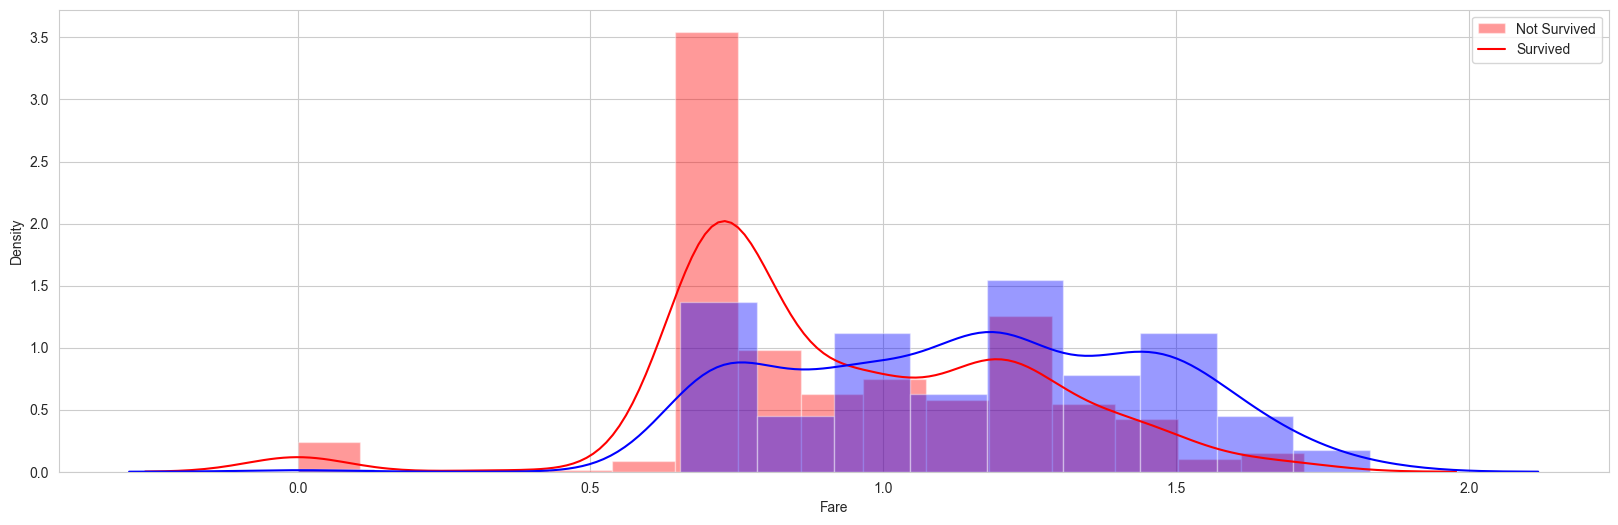

In [56]:
# Apply log to Fare to reduce skewness distribution
for dataset in full_data:
    dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
a4_dims = (20, 6)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.distplot(train["Fare"][train["Survived"] == 0], color="r", label="Skewness : %.2f"%(train["Fare"].skew()), ax=ax)
g = sns.distplot(train["Fare"][train["Survived"] == 1], color="b", label="Skewness : %.2f"%(train["Fare"].skew()))
#g = g.legend(loc="best")
g = g.legend(["Not Survived","Survived"])

In [57]:
for dataset in full_data:
    dataset.loc[ dataset['Fare'] <= 2.7, 'Fare'] 						      = 0
#    dataset.loc[(dataset['Fare'] > 2.7) & (dataset['Fare'] <= 3.2), 'Fare']   = 1
#    dataset.loc[(dataset['Fare'] > 3.2) & (dataset['Fare'] <= 3.6), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 2.7, 'Fare'] 							  = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train['Fare'].value_counts()

Fare
0    891
Name: count, dtype: int64

In [60]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length,FamilySize,IsAlone,Boys,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,5,1,0,A/5 21171,0,NaN,S,0,2,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,0,C85,C,3,2,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,5,0,0,STON/O2. 3101282,0,NaN,S,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,0,C123,S,3,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,1,0,0,373450,0,NaN,S,1,1,1,0,0


In [58]:
# Feature that tells whether a passenger had a cabin on the Titanic (O if no cabin number, 1 otherwise)
for dataset in full_data:
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

train[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).sum().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
0,0,206
1,1,136


In [59]:
train[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
1,1,0.666667
0,0,0.299854


In [61]:
for dataset in full_data:
# Remove all NULLS in the Embarked column
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_pivot = pd.pivot_table(train, values= 'Survived',index=['Embarked'],columns='Pclass',aggfunc=np.mean, margins=True)
def color_negative_red(val):
    # Takes a scalar and returns a string with the css property 'color: red' if below 0.4, black otherwise.
    color = 'red' if val < 0.4 else 'black'
    return 'color: %s' % color
train_pivot = train_pivot.style.applymap(color_negative_red)
train_pivot



/var/folders/78/njcscll93_s6cc27zw_h0pmr0000gn/T/ipykernel_98280/1137505318.py:7: FutureWarning: The provided callable <function mean at 0x10aa84fe0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  train_pivot = pd.pivot_table(train, values= 'Survived',index=['Embarked'],columns='Pclass',aggfunc=np.mean, margins=True)
/var/folders/78/njcscll93_s6cc27zw_h0pmr0000gn/T/ipykernel_98280/1137505318.py:7: FutureWarning: The provided callable <function mean at 0x10aa84fe0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  train_pivot = pd.pivot_table(train, values= 'Survived',index=['Embarked'],columns='Pclass',aggfunc=np.mean, margins=True)
/var/folders/78/njcscll93_s6cc27zw_h0pmr0000gn/T/ipykernel_98280/1137505318.py:7: FutureWarning: The p

Pclass,1,2,3,All
Embarked,,,,
0,0.589147,0.463415,0.189802,0.339009
1,0.694118,0.529412,0.378788,0.553571
2,0.500000,0.666667,0.375000,0.389610
All,0.629630,0.472826,0.242363,0.383838


<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
/var/folders/78/njcscll93_s6cc27zw_h0pmr0000gn/T/ipykernel_98280/4022263163.py:5: SyntaxWarning: invalid escape sequence '\.'
  title_search = re.search(' ([A-Za-z]+)\.', name)


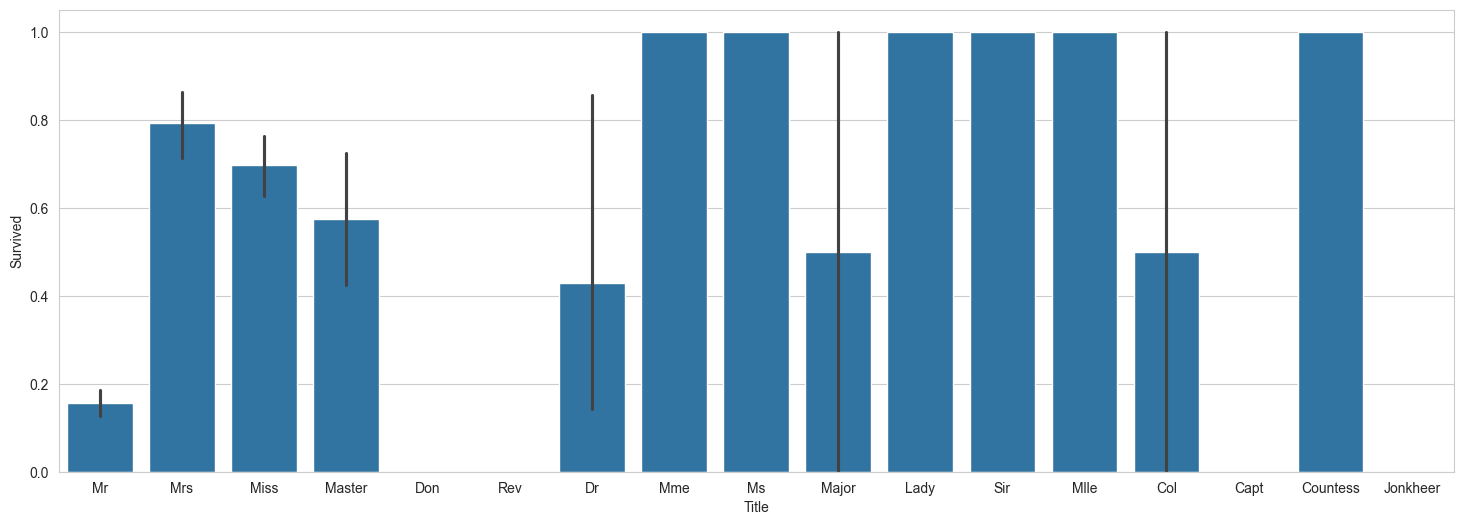

In [63]:
import re

# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
 # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
for dataset in full_data:
# Create a new feature Title, containing the titles of passenger names
    dataset['Title'] = dataset['Name'].apply(get_title)

fig, (axis1) = plt.subplots(1,figsize=(18,6))
sns.barplot(x="Title", y="Survived", data=train, ax=axis1);

/Users/xiangshiyin/Documents/Teaching/machine-learning-for-actuarial-science/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/xiangshiyin/Documents/Teaching/machine-learning-for-actuarial-science/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, ple

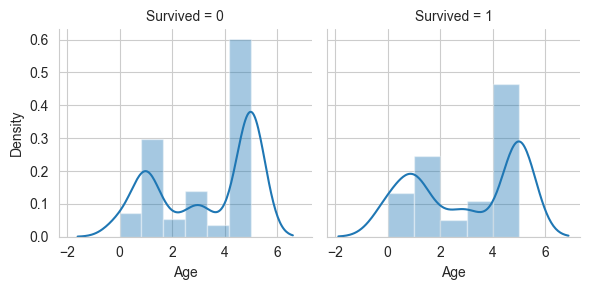

In [64]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Mrs', 'Miss'], 'MM')
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Major', 'Col'], 'DMC')
    dataset['Title'] = dataset['Title'].replace(['Don', 'Rev', 'Capt', 'Jonkheer'],'DRCJ')
    dataset['Title'] = dataset['Title'].replace(['Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'Countess'],'MMLSMC' )
# Mapping titles
    title_mapping = {"MM": 1, "Master":2, "Mr": 5, "DMC": 4, "DRCJ": 3, "MMLSMC": 0}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(3)
    
# Explore Age vs Survived
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

In [65]:
train[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
0,0,1.000000
1,1,0.736156
2,2,0.575000
4,4,0.454545
5,5,0.156673
3,3,0.000000


In [69]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
for dataset in full_data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 
train['Deck'].value_counts()

Deck
8    687
3     59
2     47
4     33
5     32
1     15
6     13
7      4
0      1
Name: count, dtype: int64

<Axes: xlabel='Deck', ylabel='Survived'>

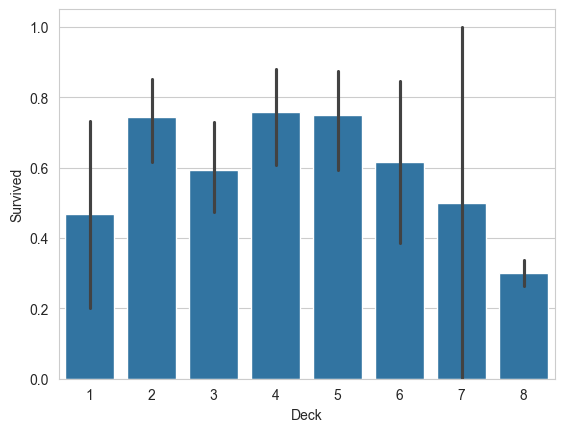

In [67]:
sns.barplot(x = 'Deck', y = 'Survived', order=[1,2,3,4,5,6,7,8], data=train)

In [70]:
for dataset in full_data:
    dataset.loc[ dataset['Deck'] <= 1, 'Deck'] = 1
    dataset.loc[(dataset['Deck'] > 1) & (dataset['Deck'] <= 6), 'Deck']  = 3
    dataset.loc[ dataset['Deck'] > 6, 'Deck'] = 0
train[["Deck", "Survived"]].groupby(['Deck'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Deck,Survived
2,3,0.690217
1,1,0.437500
0,0,0.301013


In [71]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length,FamilySize,IsAlone,Boys,Has_Cabin,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,5,1,0,A/5 21171,0,U0,0,0,2,0,0,0,5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,0,C85,1,3,2,0,0,1,1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,5,0,0,STON/O2. 3101282,0,U0,0,0,1,1,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,0,C123,0,3,2,0,0,1,1,3
4,5,0,3,"Allen, Mr. William Henry",1,1,0,0,373450,0,U0,0,1,1,1,0,0,5,0


In [72]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,name_length,FamilySize,IsAlone,Boys,Has_Cabin,Title,Deck
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,3.184063,0.523008,0.381594,0.0,0.361392,1.023569,1.904602,0.602694,0.043771,0.228956,3.415264,0.637486
std,257.353842,0.486592,0.836071,0.477990,1.934841,1.102743,0.806057,0.0,0.635673,1.016993,1.613459,0.489615,0.204700,0.420397,1.912805,1.213180
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,4.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,5.000000,1.000000,0.000000,0.0,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,5.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,5.000000,8.000000,6.000000,0.0,2.000000,3.000000,11.000000,1.000000,1.000000,1.000000,5.000000,3.000000


In [73]:
train[['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'Has_Cabin', 'FamilySize', 'Title', 'Survived']].groupby(['Survived'], as_index=False).mean().sort_values(by='Pclass', ascending=False)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,Title
0,0,2.531876,0.852459,3.311475,0.329690,0.0,0.307832,0.123862,1.883424,4.273224
1,1,1.950292,0.318713,2.979532,0.464912,0.0,0.447368,0.397661,1.938596,2.038012


- Only 38% survived, a real tragedy :-(
- Passengers in more expensive classes 1 and 2 had much higher chance of surviving than classes 3 or 4.
- Also, the higher the fare, the higher the chance. Similarly, having a cabin increases the chance of survival.
- Women (0) higher chance than men (1)
- Younger people slightly more chance than older
- Being alone decreased your chance to survive.

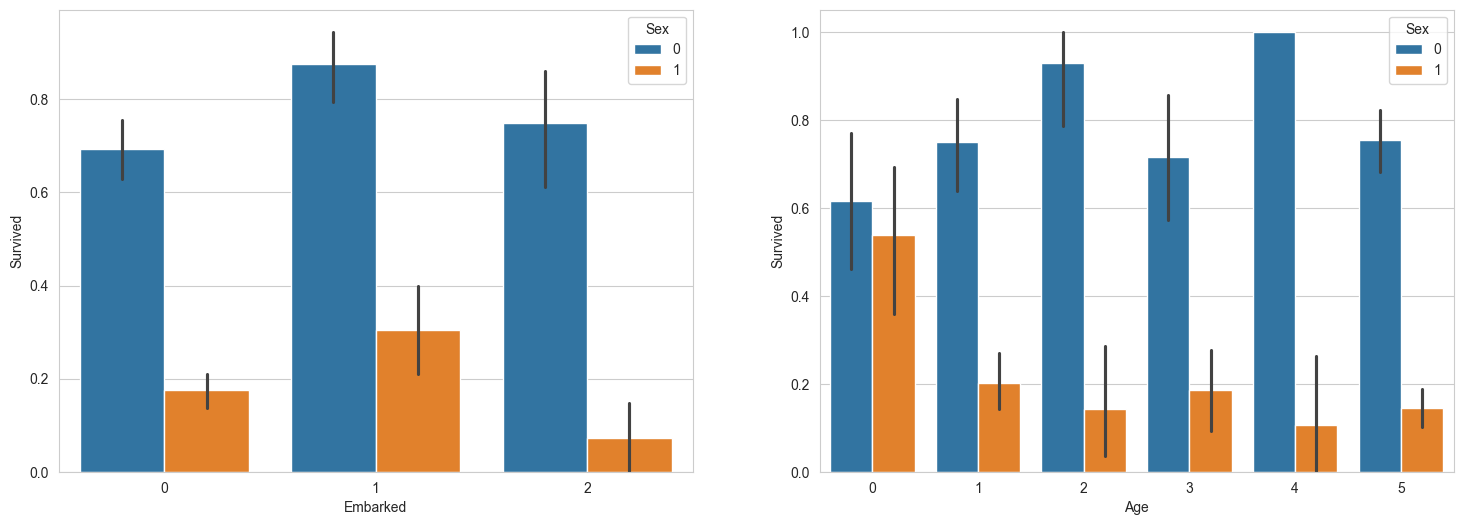

In [75]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train, ax = axis1);
sns.barplot(x="Age", y="Survived", hue="Sex", data=train, ax = axis2);

In [76]:
train[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [77]:
for dataset in full_data:
    dataset['Gender_Embarked'] = 0
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==0), 'Gender_Embarked'] = 0
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==2), 'Gender_Embarked'] = 1
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==1), 'Gender_Embarked'] = 2
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==2), 'Gender_Embarked'] = 3
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==0), 'Gender_Embarked'] = 4
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==1), 'Gender_Embarked'] = 5
train[["Gender_Embarked", "Survived"]].groupby(['Gender_Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Gender_Embarked,Survived
2,2,0.876712
1,1,0.750000
0,0,0.692683
5,5,0.305263
4,4,0.174603
3,3,0.073171


In [78]:
train_pivot = pd.pivot_table(train, values= 'Survived',index=['Title', 'Pclass'],columns='Sex',aggfunc=np.mean, margins=True)
def color_negative_red(val):
    # Takes a scalar and returns a string with the css property 'color: red' if below 0.4, black otherwise.
    color = 'red' if val < 0.4 else 'black'
    return 'color: %s' % color
train_pivot = train_pivot.style.applymap(color_negative_red)
train_pivot

/var/folders/78/njcscll93_s6cc27zw_h0pmr0000gn/T/ipykernel_98280/878475288.py:1: FutureWarning: The provided callable <function mean at 0x10aa84fe0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  train_pivot = pd.pivot_table(train, values= 'Survived',index=['Title', 'Pclass'],columns='Sex',aggfunc=np.mean, margins=True)
/var/folders/78/njcscll93_s6cc27zw_h0pmr0000gn/T/ipykernel_98280/878475288.py:1: FutureWarning: The provided callable <function mean at 0x10aa84fe0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  train_pivot = pd.pivot_table(train, values= 'Survived',index=['Title', 'Pclass'],columns='Sex',aggfunc=np.mean, margins=True)
/var/folders/78/njcscll93_s6cc27zw_h0pmr0000gn/T/ipykernel_98280/878475288.py:1: FutureWarning: 

In [79]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2, aspect=3)
grid.map(plt.hist, 'Age', alpha=.5, bins=8)
grid.add_legend();

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'

- Family-size of 3 or 4 from first pivot
- Women and men alone on first class (second pivot, red showing survival rate below 0.4)
- Top-right in the graph above: first class and age categories 1 and 2